In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data/dataset_turnos.csv')

In [2]:
x_columnas = ['endofmonth','emailvalid','DayName','priordayholiday','nextdayholiday','day','hour','age','daysbeforereserved','outofschedule','firsttime','speciality','gender','citypatient','healthcoverage','buildingcity']
y_columnas = ['appointmentstate']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)

In [3]:
data_dummies=pd.get_dummies(data_modelo[['DayName','speciality','gender','healthcoverage']], drop_first = True)

In [4]:
data_modelo = pd.concat([data[['endofmonth','day','hour','emailvalid','appointmentstate','priordayholiday','nextdayholiday','age','daysbeforereserved','outofschedule','firsttime']],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)

In [5]:
X=data_modelo.drop(['appointmentstate'],axis=1)

y = data_modelo[y_columnas].squeeze()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_train, knn.predict(X_train_std))

0.7930365333418866

Text(33.0, 0.5, 'Reales')

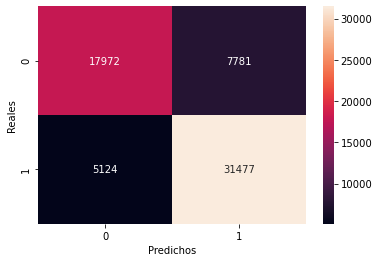

In [10]:
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')